# Anomaly Detection Project
***
***

# GOALS<a id='goals'></a>

Explore the curriculum access data to answer various questions

I will also deliver the following:
- An email that answers each question
- A Jupyter Notebook that documents my process of answering the questions from start to finish
- A Google slide that summarizes the most important findings of the project

A link to the google slide can be found below.

https://docs.google.com/presentation/d/16F8CdOyWqtSkZB-Gh8Awc6CdHuPmpLpuf83EpKb8ZZA/edit?usp=sharing
***

In [1]:
# establishing environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from acquire import get_codeup_data
from prepare import combine_codeup_data
from prepare import null_filler

import warnings
warnings.filterwarnings("ignore")

# ACQUIRE<a id='acquire'></a>
I will acquire the data for this project using __get_codeup_data__ function from my __acquire.py__ file.
***

In [2]:
# using function to acquire data
logs, cohorts = get_codeup_data()

In [3]:
# previewing logs data
logs.head(2)

,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [4]:
# previewing cohorts data
cohorts.head(2)

,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1


# PREPARE <a id='prepare'></a>
I will prepare the data for the exploration necessary to answer the various questions I was asked.
***

### Combine the data from the two separate DFs using the __combine_codeup_data__ function from my __prepare.py__ file.

In [5]:
# combining DFs using function from local prepare.py file
df = combine_codeup_data(logs, cohorts)

In [6]:
# previewing data 
df.head()

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0


### I'm going to use .info to check if the column data types are appropriate and if there are any null values

In [7]:
# using .info to check data types and null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719458 non-null  object 
 1   user_id      719459 non-null  int64  
 2   cohort_id    674619 non-null  float64
 3   ip           719459 non-null  object 
 4   name         674619 non-null  object 
 5   start_date   674619 non-null  object 
 6   end_date     674619 non-null  object 
 7   program_id   674619 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 49.4+ MB


- Update missing values with special values that distinguish them from non-nulls
    - page_viewed: PageUnknown
    - cohort_id: 0
    - name: unknown
    - start_date and end_date: 01-01-1900
    - program_id: 0
- Change start_date and end_date data types to datetime

### I'm going to use my null_filler function from my prepare.py file to fill null values with the values specified above.

In [8]:
# Using function from prepare file to fill null values
null_filler(df)

### I'm going to change the start_date and end_date column data types to datetime.

In [9]:
# using to_datetime to convert start and end date columns to datetime format
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

In [10]:
# Checking to confirm if all nulls are removed and date column data types are converted
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   page_viewed  719459 non-null  object        
 1   user_id      719459 non-null  int64         
 2   cohort_id    719459 non-null  float64       
 3   ip           719459 non-null  object        
 4   name         719459 non-null  object        
 5   start_date   719459 non-null  datetime64[ns]
 6   end_date     719459 non-null  datetime64[ns]
 7   program_id   719459 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 49.4+ MB


### I'm going to split the data science, web development, and unknown cohorts into separate DFs to make exploring them separately easier.

First I'll need to identify which program IDs belong with web development and which belong to data science.

I'll do this by cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF and take note of their program IDs.

In [11]:
# filtering for an Andromeda cohort row to see what program ID it is associated with
df[df.name == 'Andromeda'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-03-18 16:01:40,assets/js/pdfmake.min.js.map,373,31.0,97.105.19.58,Andromeda,2019-03-18,2019-07-30,2.0


__Andromeda is a web development cohort so program id 2 indicates a web dev cohort.__

In [12]:
# filtering for an Arches cohort row to see what program ID it is associated with
df[df.name == 'Arches'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0


__Arches is a web development cohort so program id 1 indicates a web dev cohort.__

In [13]:
# filtering for an Apollo cohort row to see what program ID it is associated with
df[df.name == 'Apollo'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-03-22 19:01:49,/,152,9.0,207.68.209.17,Apollo,2015-03-30,2015-07-29,4.0


__Apollo is a web development cohort program id 4 indicates a web dev cohort.__

In [14]:
# filtering for a Darden cohort row to see what program ID it is associated with
df[df.name == 'Darden'].head(1)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:34:44,/,678,59.0,76.201.20.193,Darden,2020-07-13,2021-01-12,3.0


__Darden is a data science cohort so program id 3 indicates a Data Science cohort.__

### After cross-referencing the cohorts featured at <https://alumni.codeup.com> with the name column in my DF, I was able to determine that
 - Web development cohorts correspond with program IDs 1, 2 and 4
 - Data science cohorts correspond with program ID 3

### Now that I know what program IDs correspond to web dev and DS cohorts, I can split them accordingly.

In [15]:
# creating web dev DF 
wd = df[(df.program_id == 1) | ((df.program_id == 2) & (df.name != 'Staff')) | (df.program_id == 4)]

# creating data science DF
ds = df[df.program_id == 3]

# creating DF for unknown cohort rows
unk = df[df.program_id == 0]

## Prepare Takeaways
- Data prepared for exploration via
    - Merging data from separate source files
    - Filling null values
    - Splitting complete data frame into separate cohort data frames
        - web development
        - data science
        - unknown cohort

# EXPLORE<a id='explore'></a>
I'm going to explore the data in order to answer the various questions I was presented with.
***

# <a id='q1w'></a>Question 1 - Which lesson appears to attract the most traffic consistently across cohorts?

I'm going to answer this by creating a DF that shows the average amount of times each page was viewed by each cohort. I'll then sort the values by the average number of views and identify the top 3 most popular lessons.

## Q1 -  Web Development

In [16]:
# creating a crosstab of page_viewed and cohort name
wd_avg_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_avg_views['avg_views_per_cohort'] = wd_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
wd_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,723.194444
toc,355.333333
javascript-i,351.083333
search/search_index.json,310.416667
java-iii,269.500000
html-css,260.722222
java-ii,252.000000
spring,244.027778
jquery,228.638889


## Q1 - Data Science

In [17]:
# creating a crosstab of page_viewed and cohort name
ds_avg_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_avg_views['avg_views_per_cohort'] = ds_avg_views.mean(axis=1)

# sorting by avg_views_per_cohort column
ds_avg_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_avg_views[['avg_views_per_cohort']].head(10)

name,avg_views_per_cohort
page_viewed,
/,1802.000000
1-fundamentals/modern-data-scientist.jpg,521.000000
1-fundamentals/AI-ML-DL-timeline.jpg,519.666667
1-fundamentals/1.1-intro-to-data-science,512.000000
search/search_index.json,443.666667
6-regression/1-overview,374.333333
classification/overview,286.666667
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,248.333333
10-anomaly-detection/1-overview,247.333333


## QUESTION 1 - ANSWERS<a id='q1a'></a>

### Web Development
The most visited lesson page on average across all web development cohorts is __<ins>Javascript-I</ins>__
    
### Data Science
The lesson page with the most views on average across all data science cohorts is __<ins>1-fundamentals/1.1-intro-to-data-science</ins>__.
    
### Note
The top page, " / ", was not counted since it's not a lesson.

# <a id='q2w'></a>Question 2 -  Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?
I will answer this question by first identifying the most lessons in each program with the most views. I'll then plot the amount of times that each cohort viewed each lesson to identify lessons that one cohort viewed significantly more than any other cohort. 

## Q2 - Web Development

In [18]:
# creating a crosstab of page_viewed and cohort name
wd_sum_views = pd.crosstab(wd.page_viewed, wd.name)

# creating new column that holds the average amount of times each cohort has visited a page
wd_sum_views['sum_views_per_cohort'] = wd_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
wd_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
wd_sum_views[['sum_views_per_cohort']].head(20)

name,sum_views_per_cohort
page_viewed,
/,26035
toc,12792
javascript-i,12639
search/search_index.json,11175
java-iii,9702
html-css,9386
java-ii,9072
spring,8785
jquery,8231


In [19]:
# creating list of lessons that i want to include in a new DF that I'm creating
wd_lesson_cols = ['javascript-i', 'javascript-ii', 'java-i', 'java-ii', 'java-iii', 'html-css', 'spring', 'mysql']

# filtering for only rows that with a page_viewed value that matches one of the lessons listed above
wd_lesson_views = wd[wd.page_viewed.isin(wd_lesson_cols)]

# checking DF to see if filter was successful
wd_lesson_views

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 10:00:39,javascript-i,6,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:23,javascript-i,6,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:18:24,spring,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2.0
...,...,...,...,...,...,...,...,...
2020-11-02 15:42:05,java-iii,733,61.0,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:04:19,java-iii,733,61.0,107.77.220.169,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:13:52,java-iii,747,61.0,70.125.129.102,Bash,2020-07-20,2021-01-21,2.0


In [20]:
# creating cross tab of all lesson names with cohort names
wd_lesson_views_ct = pd.crosstab(wd_lesson_views.name, wd_lesson_views.page_viewed)

# renaming columns to improve their understandability in my upcoming plot
wd_lesson_views_ct.columns = ['Page Views for "HTML-CSS"', 'Page Views for "Java-I"', 'Page Views for "Java-II"', 'Page Views for "Java-III"', 'Page Views for "JavaScript I"', 'Page Views for "JavaScript II"', 'Page Views for "MySQL"', 'Page Views for "Spring"']

# previewing DF
wd_lesson_views_ct.head()

,"Page Views for ""HTML-CSS""","Page Views for ""Java-I""","Page Views for ""Java-II""","Page Views for ""Java-III""","Page Views for ""JavaScript I""","Page Views for ""JavaScript II""","Page Views for ""MySQL""","Page Views for ""Spring"""
name,,,,,,,,
Andromeda,372,336,395,430,509,290,346,485
Apex,708,528,595,616,610,431,445,572
Arches,215,132,167,153,294,204,95,192
Badlands,2,1,0,0,1,0,0,0
Bash,214,157,190,72,319,175,136,29


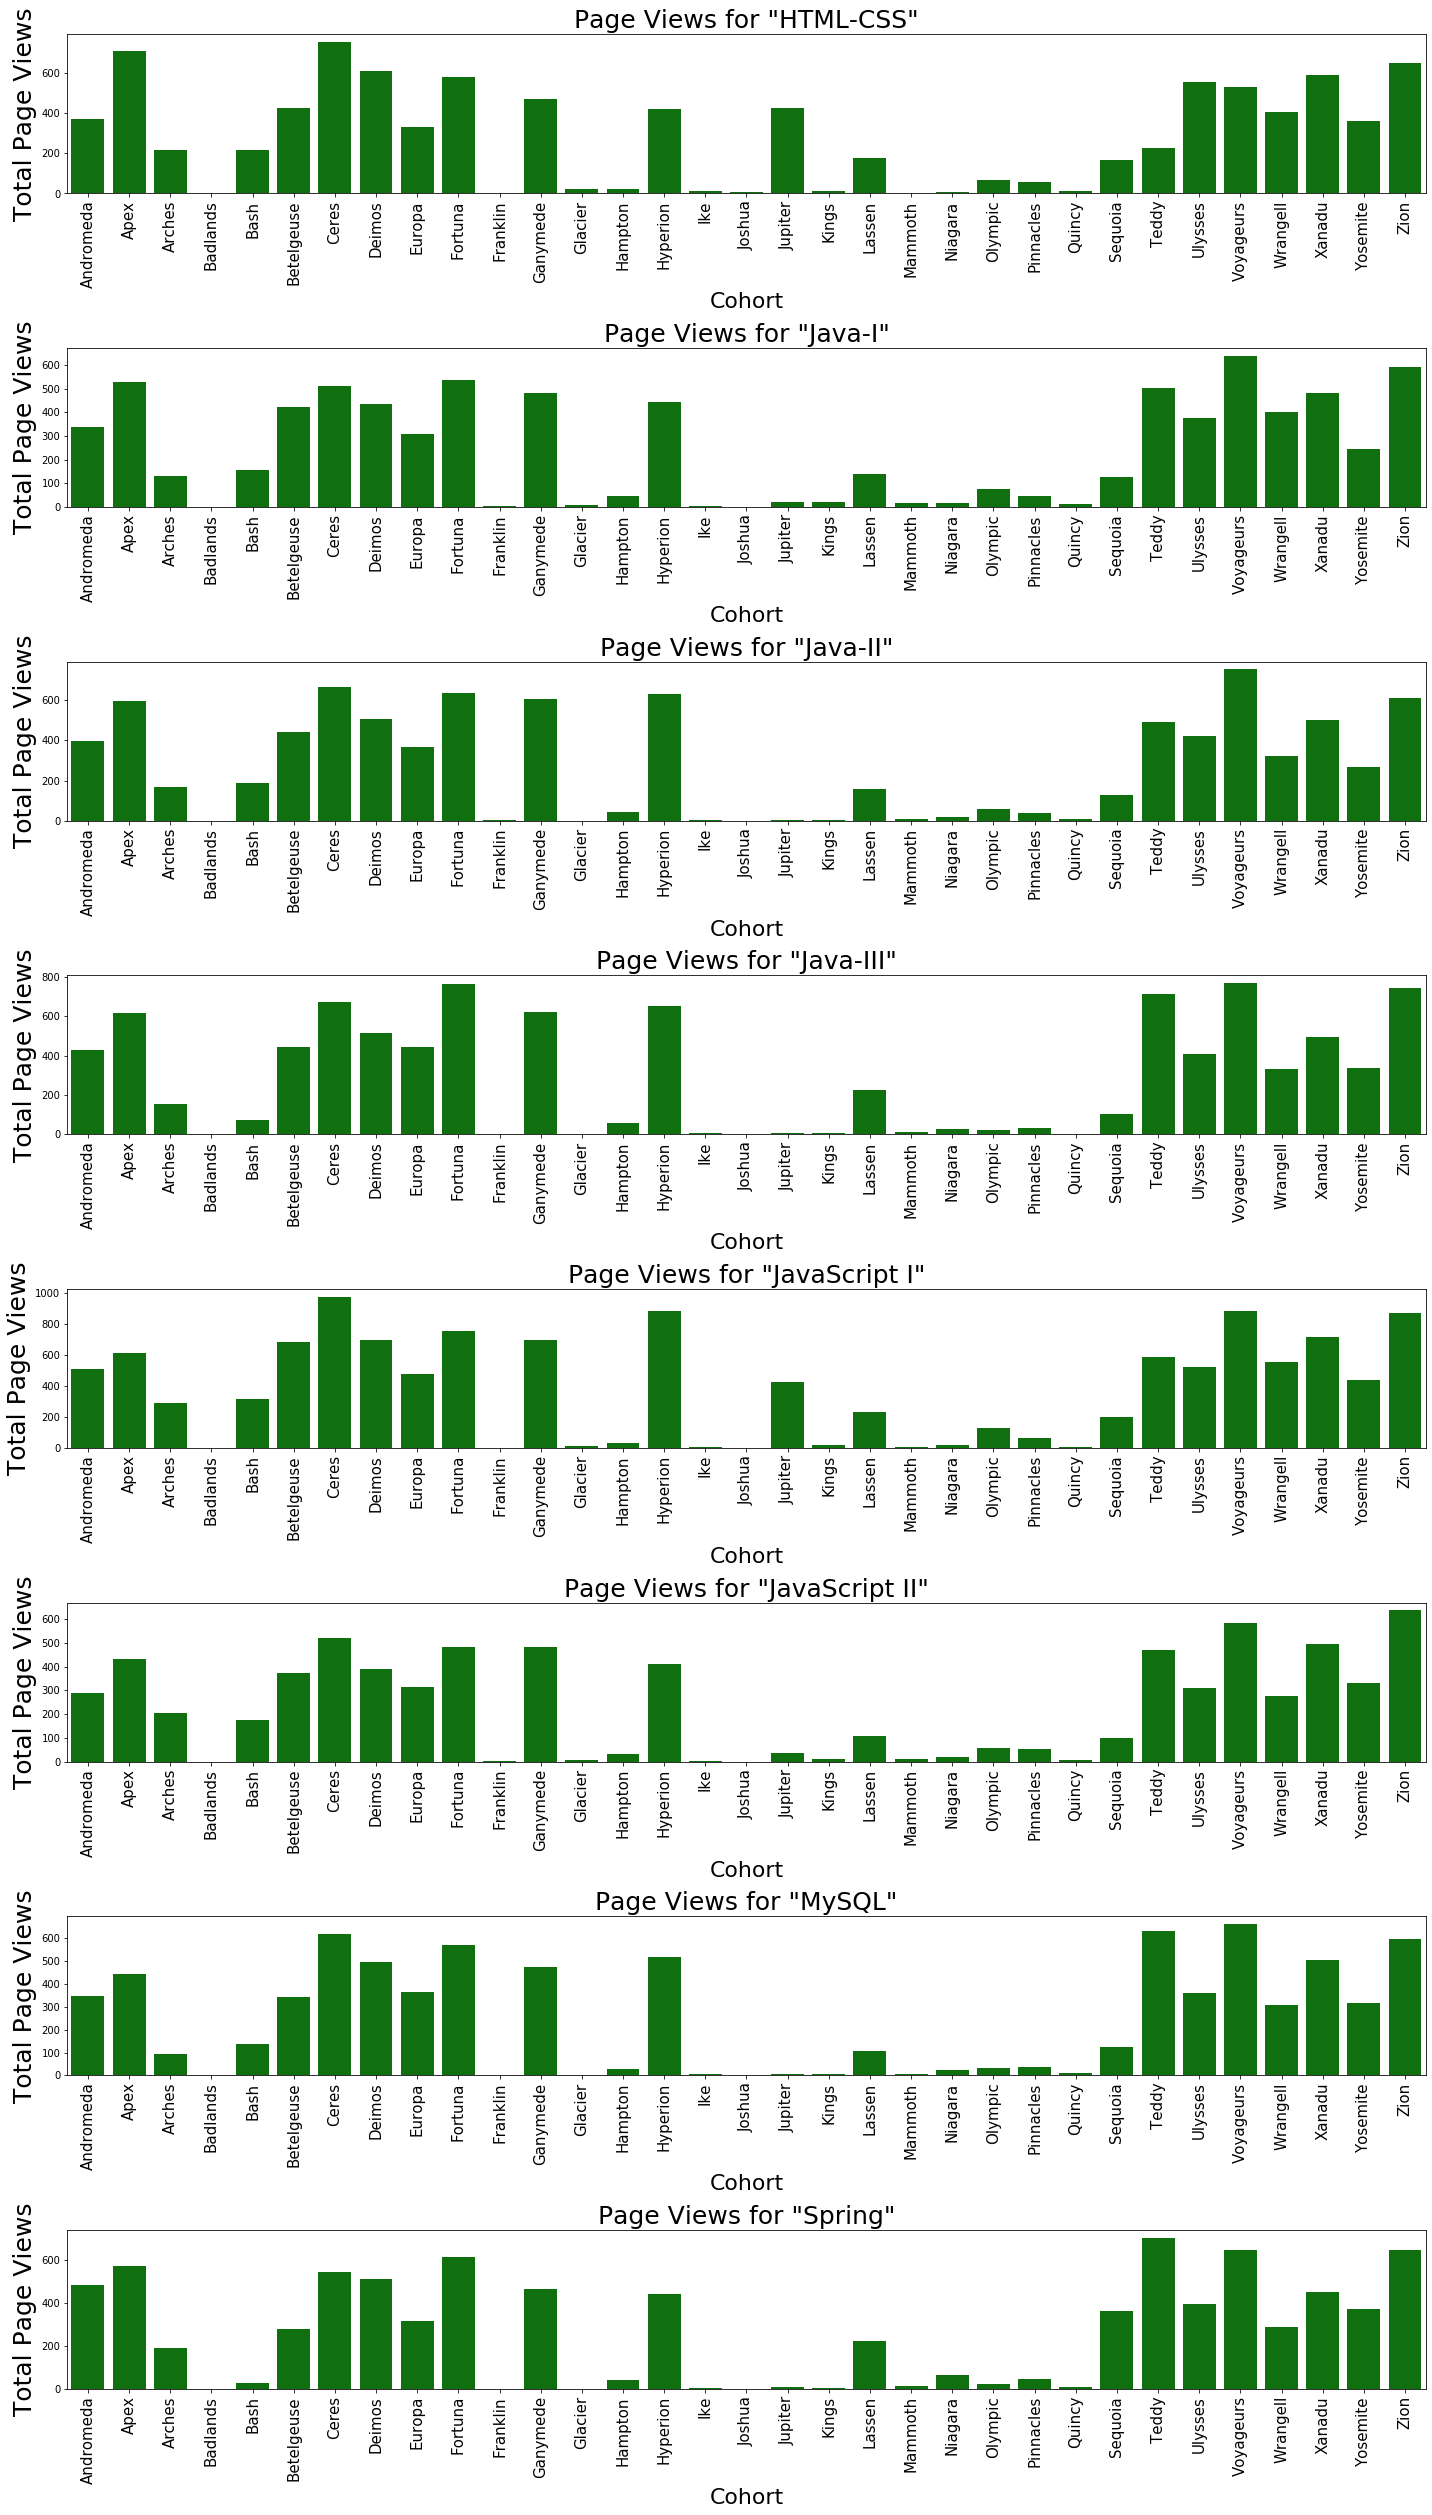

In [21]:
# setting x to start at 1
# x will determine the position of each plot
x = 1

# setting figure size 
plt.figure(figsize=(20,35))

# creating for loop to create plot

# iterate through each column in crosstab above
for col in wd_lesson_views_ct.columns:
    # specifying dimension of subplot and position of current subplot
    plt.subplot(8,1,x)
    # incrementing x by 1
    x = x + 1
    # create barplot using data in crosstab above
    sns.barplot(x = wd_lesson_views_ct.index, y = wd_lesson_views_ct[col], color = 'Green')
    # set x tick roation degree, title and axis labels
    plt.xticks(rotation=90, fontsize = 15)
    plt.title(col,fontsize = 25)
    plt.xlabel('Cohort', fontsize = 22)
    plt.ylabel('Total Page Views', fontsize = 25)

# prevent subplots from being too close to each other
plt.tight_layout()

## Q2 - Data Science

In [22]:
# creating a crosstab of page_viewed and cohort name
ds_sum_views = pd.crosstab(ds.page_viewed, ds.name)

# creating new column that holds the average amount of times each cohort has visited a page
ds_sum_views['sum_views_per_cohort'] = ds_sum_views.sum(axis=1)

# sorting by sum_views_per_cohort column
ds_sum_views.sort_values(by='sum_views_per_cohort', ascending=False, inplace = True)

# viewing top 10
ds_sum_views[['sum_views_per_cohort']].head(10)

name,sum_views_per_cohort
page_viewed,
/,5406
1-fundamentals/modern-data-scientist.jpg,1563
1-fundamentals/AI-ML-DL-timeline.jpg,1559
1-fundamentals/1.1-intro-to-data-science,1536
search/search_index.json,1331
6-regression/1-overview,1123
classification/overview,860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,745
10-anomaly-detection/1-overview,742


In [23]:
# creating list of lessons that i want to include in a new DF that I'm creating
high_ds_view_cols = ['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview', 'classification/overview', '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview']

# filtering for only rows that with a page_viewed value that matches one of the lessons listed above
ds_popular_lesson_views = ds[ds.page_viewed.isin(high_ds_view_cols)]

# previewing DF 
ds_popular_lesson_views.head()

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:42:10,1-fundamentals/1.1-intro-to-data-science,472,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [24]:
# creating crosstab of lesson names and cohort names
ds_popular_lesson_views_ct = pd.crosstab(ds_popular_lesson_views.name, ds_popular_lesson_views.page_viewed)

# updating column names so they are more understandable when plotted
ds_popular_lesson_views_ct.columns = ['Page Views for "Intro to Data Science"', 'Page Views for "Regression Overview"', 'Page Views for "Classification Overview"', 'Page Views for "Anomaly-Detection Overview"', 'Page Views for "Sql/Mysql Overview"']

# observing DF
ds_popular_lesson_views_ct.head()

,"Page Views for ""Intro to Data Science""","Page Views for ""Regression Overview""","Page Views for ""Classification Overview""","Page Views for ""Anomaly-Detection Overview""","Page Views for ""Sql/Mysql Overview"""
name,,,,,
Bayes,615,383,142,521,10
Curie,461,345,441,595,91
Darden,460,14,121,7,759


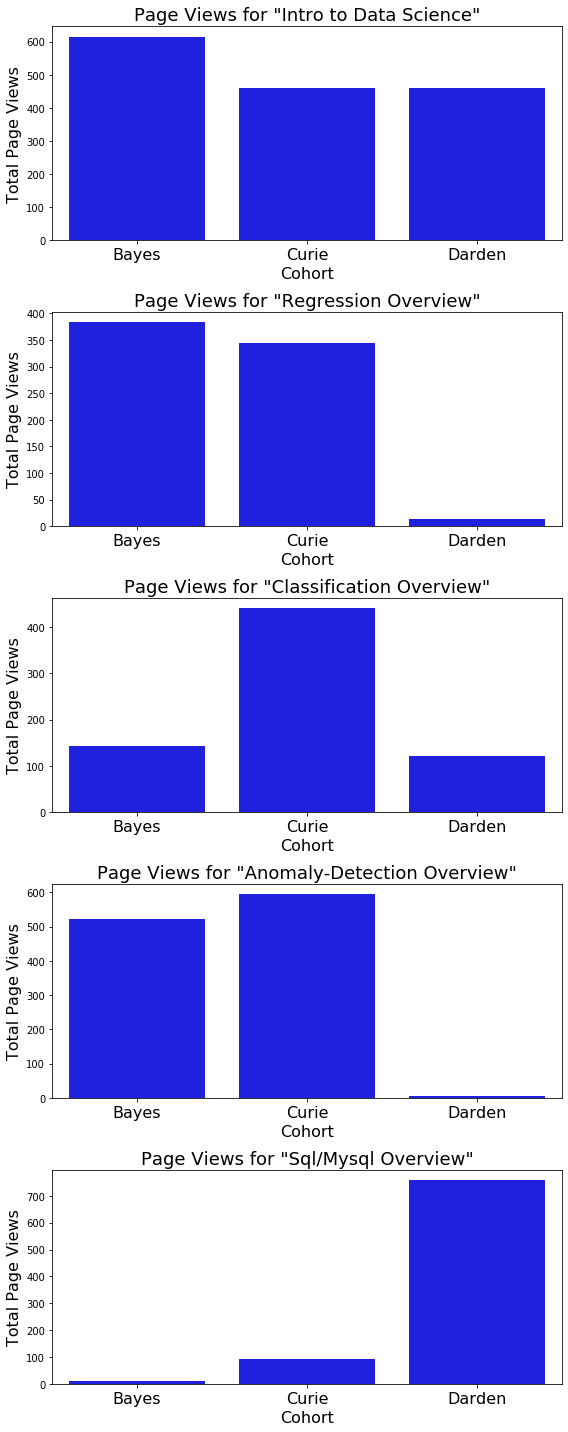

In [25]:
# setting x to 1. x specifies what spot a subplot will take
x = 1
# setting figure size
plt.figure(figsize=(8,20))

# iterating through each column
for col in ds_popular_lesson_views_ct.columns:
    # specifying dimension of subplots and position of current plot
    plt.subplot(5,1,x)
    # incrementing x by 1 at each iteration
    x = x + 1
    # creating subplot using data in crosstab above
    sns.barplot(x = ds_popular_lesson_views_ct.index, y = ds_popular_lesson_views_ct[col],color='Blue')
    # set x tick font size, title and axis labels
    plt.xticks(fontsize = 16)
    plt.title(col, fontsize = 18, y=1)
    plt.xlabel('Cohort', fontsize = 16)
    plt.ylabel('Total Page Views', fontsize = 16)

# using tight_layout to ensure subplots aren't too close together
plt.tight_layout()

# QUESTION 2 - Answers<a id='q2a'></a>

### Web Development
I was not able to identify any lessons that one single cohort viewed significantly more than all others. Every lesson that was referred to significantly was referred to by multiple cohorts, not just one.

### Data Science

I found 2 pages that were visited significantly more by one cohort than the others.
- __Curie__ visited the __SQL overview__ page roughly 300 more times than Darden or Bayes
- __Darden__ visited the __classification overview__ page roughly 600 more times than Curie or Bayes

# <a id='q3w'></a>Question 3 - Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
To answer this question I'm going to filter the dataframes down to rows where the student is accessing a page while they are an active student (ie. date of activity is within start and end date values). Afterwards, I'll look for students who have relatively low page views and gather information about them.

## Q3 - Web Development

In [26]:
# filtering for rows where the date of the activity is between the start and end date of the user's cohort
active_wd = wd[(wd.index >= wd.start_date) & (wd.index <= wd.end_date)]

# grouping by user id, county number of pages viewed, displaying 3 users with lowest page visits
active_wd.groupby('user_id')['page_viewed'].count().sort_values().head(3)

user_id
619    1
278    4
539    5
Name: page_viewed, dtype: int64

### Now that I've identified the 3 users with the lowest amount of page views (listed below), I'm going to analyze their activity more in-depth in an attempt to make inferences about who they may be. 

- User 619
- User 278
- User 539

### User 619

In [27]:
# looking for all activity of user while their cohort was active
active_wd[active_wd.user_id==619]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2.0


In [28]:
# looking for all activity of user, regardless of cohort active state 
# were they active after the cohort ended?
wd[wd.user_id==619]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2.0


In [29]:
# checking if their IP was used by any other users
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 619's activity
- Only accessed site once while their cohort was active
    - Page was accessed on first day of class
    - Only page accessed was homepage, " / "
- Never accessed any pages while their cohort was inactive
- User's IP was used by 328 other users

Given that they only accessed the homepage on the first day of class and many other students share their IP, perhaps this was a student who had to have their user ID changed on the first day of class. Given the sparse amount of information I have about this user, it's difficult to discern what their new user ID may be.

### User 278

In [30]:
# looking for activity of user while their cohort was active
active_wd[active_wd.user_id==278]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-09-27 13:57:44,/,278,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [31]:
# looking for all activity of user, regardless of cohort active state 
# were they active after the cohort ended?
wd[wd.user_id==278].sort_index(ascending=False)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-02-09 17:58:51,mysql/databases,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:58:08,mysql/tables,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:37:19,mysql/basic-statements,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:35:43,mysql/tables,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:31:50,mysql/introduction,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...
2018-10-16 18:55:42,/,278,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [32]:
# checking how many different IPs they used
wd[wd.user_id==278]['ip'].value_counts()

67.11.175.66    64
107.77.217.9     3
97.105.19.58     1
Name: ip, dtype: int64

In [33]:
# checking if anyone else used this IP
wd[wd.ip == '107.77.217.9']

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,Voyageurs,2018-05-29,2018-10-11,2.0


In [34]:
# checking if anyone else used this IP
wd[wd.ip == '67.11.175.66']['user_id'].value_counts()

196    256
278     64
Name: user_id, dtype: int64

In [35]:
# reviewing activity of user who shared one of their IPs
wd[wd.user_id==196]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-05-29 14:42:50,/,196,24.0,97.105.19.61,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:22:48,html-css,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:08,html-css/introduction,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:14,html-css/elements,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:25,html-css/forms,196,24.0,67.11.175.66,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...
2018-09-27 13:56:45,java-i/methods,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:57,java-ii,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:59,java-ii/object-oriented-programming,196,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2.0


In [36]:
# checking if anyone else used this IP
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 278's activity
- Only accessed site 4 times while their cohort was active
    - Pages were accessed roughly one month prior to end of cohort
    - Pages accessed were homepage and Java-II pages
- Accessed site 64 times after cohort became inactive
- User used 3 different IPs
    - One IP was used to access the Java Pages while cohort was active 
    - Another IP is the same one that user 619 and over 300 other users have used
        - It was used to access the homepage once while cohort was active
    - The last IP was used to access site after cohort ended
        - This IP was used throughout the cohort by user 196 while the cohort was active

In summary, the user only accessed the site 4 times near the end of their cohort. After their cohort ended, the user accessed the site roughly 60 more times. One of the user's IPs was used by user 196 throughout the cohort while it was active. These points suggest that user 278 is an alternate user account for user 196. 

### User 539

In [37]:
# looking for activity of user while their cohort was active
active_wd[active_wd.user_id == 539]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0


In [38]:
# looking for all activity of user, regardless of cohort active state 
# were they active after the cohort ended?
wd[wd.user_id == 539].sort_index(ascending=False)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2.0


In [39]:
# checking if anyone else used their IP
wd[wd.ip == '97.105.19.58']['user_id'].value_counts()

53     4436
344    2621
314    2615
315    2382
418    1953
       ... 
626       1
624       1
622       1
621       1
629       1
Name: user_id, Length: 328, dtype: int64

### Observations about user 539's activity
- Only accessed site 5 times while their cohort was active
    - Pages were accessed on first day of class
- Never accessed any pages while their cohort was inactive
- User's IP was shared by 328 other users

Given that they only accessed a few pages on the first day of class and many other students share their IP, this may be a student who had user ID changed early in the cohort. Given the sparse amount of information I have about this user, it's difficult to discern what their new user ID may be.

## Q3 - Data Science

In [40]:
active_ds = ds[(ds.index >= ds.start_date) & (ds.index <= ds.end_date)]

active_ds.groupby('user_id')['page_viewed'].count().sort_values().head(3)

user_id
679    11
697    13
487    17
Name: page_viewed, dtype: int64

Now that I've identified the 3 users with the lowest amount of page views (listed below), I'm going to analyze their activity more in-depth in an attempt to make inferences about who they are.

- User 679
- User 697
- User 487

### User 679

In [41]:
# looking for activity by user since their cohort became active
# Darden is an active cohort so we can't check post-graduate dates yet
active_ds[active_ds.user_id == 679]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0


In [42]:
# looking for users who used the same IP address as this user
ds[ds.ip == '24.28.146.155'].user_id.value_counts()

698    59
679    11
Name: user_id, dtype: int64

In [43]:
# looking at activity of user who used same IP
ds[ds.user_id == 698]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-14 08:18:28,1-fundamentals/1.1-intro-to-data-science,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,modern-data-scientist.jpg,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,AI-ML-DL-timeline.jpg,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:51,1-fundamentals,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:56,/,698,59.0,24.28.146.155,Darden,2020-07-13,2021-01-12,3.0
...,...,...,...,...,...,...,...,...
2020-11-02 15:47:59,appendix/useful_libraries,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:03,appendix/ds-environment-setup,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:14,appendix/interview_questions_students,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0


In [44]:
# looking for all IPs used by user who has shared IP with user 679
ds[ds.user_id == 698].ip.value_counts()

67.11.185.104    431
24.28.150.196    284
67.11.185.135    221
67.11.56.54      168
24.28.145.253    142
67.11.186.90     127
67.11.56.165     102
24.28.146.155     59
99.203.90.58      50
67.11.185.253     46
70.117.28.76      39
99.203.91.15      10
67.11.56.174       9
67.11.185.145      3
99.203.212.61      2
99.203.27.94       1
99.203.26.44       1
Name: ip, dtype: int64

In [45]:
# checking if any other users use this IP
ds[ds.ip == '67.11.185.104'].user_id.value_counts()

698    431
Name: user_id, dtype: int64

In [46]:
# checking if any other users use this IP
ds[ds.ip == '24.28.150.196'].user_id.value_counts()

698    284
Name: user_id, dtype: int64

In [47]:
# checking if any other users use this IP
ds[ds.ip == '67.11.185.135'].user_id.value_counts()

698    221
Name: user_id, dtype: int64

In [48]:
# checking if any other users use this IP
ds[ds.ip == '67.11.56.54'].user_id.value_counts()

698    168
Name: user_id, dtype: int64

In [49]:
# checking if any other users use this IP
ds[ds.ip == '24.28.145.253'].user_id.value_counts()

698    142
Name: user_id, dtype: int64

In [50]:
# checking if any other users use this IP
ds[ds.ip == '67.11.186.90'].user_id.value_counts()

698    127
Name: user_id, dtype: int64

In [51]:
# checking if any other users use this IP
ds[ds.ip == '67.11.56.165'].user_id.value_counts()

698    102
Name: user_id, dtype: int64

### Observations about user 679's activity
- Only accessed site 11 times since cohort became active
    - Acitivity ceased after second day of class
- User's IP was shared by user 698
    - User 698 has accessed site throughout course of cohort
        - Began accessing site the last day that user 679 accessed it
        - Has used more than 10 different IP addresses, the most frequent of which have not been used by anyone else

In summary, I believe that user 679 is also user 698 since they both used an IP that no one else has and the last day that user 679 accessed the site is the same day that user 698 began accessing it. 

### User 697

In [52]:
# checking activity of user since cohort started
# darden is an active cohort so I can't check post-graduate activity yet
active_ds[active_ds.user_id == 697]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-13 15:20:27,/,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:48,3-sql/1-mysql-overview,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/modern-data-scientist.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/1.2-data-science-pipeline,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/DataToAction_v2.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:01,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:02,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0


In [53]:
# looking for any other users who used the same IP as user 697
ds[ds.ip == '136.50.70.27'].user_id.value_counts()

699    1359
697      13
Name: user_id, dtype: int64

In [54]:
# looking at all activity of user who shared IP with user 697
ds[ds.user_id == 699]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-07-14 13:37:14,/,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:27,3-sql/1-mysql-overview,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/1.1-intro-to-data-science,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/modern-data-scientist.jpg,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/AI-ML-DL-timeline.jpg,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
...,...,...,...,...,...,...,...,...
2020-09-22 20:47:30,/,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-09-22 20:47:34,sql/mysql-overview,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0
2020-09-22 20:47:40,stats/correlation,699,59.0,136.50.70.27,Darden,2020-07-13,2021-01-12,3.0


In [55]:
# checking the IPs used by this user
ds[ds.user_id == 699]['ip'].value_counts()

136.50.70.27      1359
172.58.99.212       40
172.58.110.206       7
172.58.111.202       7
172.58.102.131       3
172.58.107.219       2
172.58.110.222       2
Name: ip, dtype: int64

In [56]:
# checking if any other users use this IP
ds[ds.ip == '172.58.99.212'].user_id.value_counts()

699    40
Name: user_id, dtype: int64

In [57]:
# checking if any other users use this IP
ds[ds.ip == '172.58.110.206'].user_id.value_counts()

699    7
Name: user_id, dtype: int64

In [58]:
# checking if any other users use this IP
ds[ds.ip == '172.58.111.202'].user_id.value_counts()

699    7
Name: user_id, dtype: int64

In [59]:
# checking if any other users use this IP
ds[ds.ip == '172.58.102.131'].user_id.value_counts()

699    3
Name: user_id, dtype: int64

In [60]:
# checking if any other users use this IP
ds[ds.ip == '172.58.107.219'].user_id.value_counts()

699    2
Name: user_id, dtype: int64

In [61]:
# checking if any other users use this IP
ds[ds.ip == '172.58.110.222'].user_id.value_counts()

699    2
Name: user_id, dtype: int64

### Observations about user 697's activity
- Only accessed site 13 times on the first day of class then activity stopped
- User's IP was shared by user 699
    - User 699 frequently accessed site from the day user 697 stopped accessing it through late September
        - User 699 as used 7 different IP addresses, none of which were shared by anyone other than user 697

I believe that user 697 is also user 699 since they both used an IP that no one else has and the day after user 697 stopped accessing the site, user 699 began accessing it. Since user 699 stopped using accessing the site in September (before the program is completed), I believe they are one of the students who is no longer in the program. 

### User 487

In [62]:
# looking for activity of user while their cohort was active
active_ds[active_ds.user_id == 487]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [63]:
# looking for all activity of user regardless of cohort active state
# have they accessed the site since leaving codeup?
ds[ds.user_id == 487]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3.0


In [64]:
# checking how many different users have used the same IP as this user
ds[ds.ip == '97.105.19.58'].user_id.value_counts().shape

(40,)

### Observations about user 487's activity
- Only accessed site 17 times in one day roughly one week after course began and never again
- User's IP was shared with 40 different users

User 487 may be an one-time alternate user profile for a Bayes student since they only accessed the site a few times on one particular day near the start of the cohort. It would require a large amount of time research each user who used the same IP address as user 487 since there are so many of them. It is for this reason that my research of user 487 will end here. If time permits, I will return to this user and research further. 

# QUESTION 3 ANSWERS<a id='q3a'></a>

### Web Development

Identified the 3 web development users with lowest amount of page views while their respective cohorts were active
- User 619
- User 278
- User 539

#### User 619
- Only accessed site once while their cohort was active and never again (even after cohort finished)
- Only date of access was the first day of class
- Only IP of user was used by 328 other users

User 619 This may have been a student who had their user number changed on the first day of class or a staff member who was testing something (perhaps practicing creating a new user)

#### User 278
- Only accessed site 4 times near the end date of their cohort while it was active
- Pages were accessed roughly one month prior to end of cohort
- Accessed site 64 times after cohort became inactive
- Used 3 different IPs
    - One IP was used to access the Java Pages while cohort was active
    - Another IP was used to access the homepage while the cohort was active
        - This IP was also used by over 300 other users
    - The last IP was used to access site after cohort ended
        - This IP was also used throughout the cohort by user 196 while the cohort was active

Given that user 278 accessed the site so few times and used an IP after the cohort ended that was only used by user 196, I suspect that user 278 and user 196 are the same student.

#### User 539
- Only accessed site 5 times while their cohort was active and never again
- Pages were accessed on first day of class
- User's IP was shared by 328 other users

User 539 may be a student who had user ID changed on the first day of class. Given the sparse amount of information I have about user 539, it's difficult to discern what their new user ID may be.

### Data Science

Identified the 3 data science users with lowest amount of page views while their respective cohorts were active
- User 679
- User 697
- User 487

#### User 679
- Only accessed site 11 times
- Acitivity ceased after second day of class
- User 679's only IP was also used by user 698 throughout the course of the cohort
    - User 698 began accessing site the last day that user 679 accessed it
    - User 698 sas used more than 10 different IP addresses, the most frequent of which have not been used by anyone else

I believe that user 679 is also user 698 since they both used an IP that no one else has used and the last day that user 679 accessed the site is the same day that user 698 began accessing it.

#### User 697
- Only accessed site 13 times on the first day of class then activity stopped
- User 697's IP was shared by user 699
    - User 699 frequently accessed site from the day user 697 stopped accessing it through late September
    - User 699 as used 7 different IP addresses, none of which were shared by anyone other than the one is shared with user 697

I believe that user 697 is also user 699 since they both used an IP that no one else has used and the day after user 697 stopped accessing the site, user 699 began accessing it. Since user 699 stopped accessing the site in September (before the program was completed), I believe they are one of the students who is no longer in the program.

#### User 487
- Only accessed site 17 times, all in one day, roughly one week after course began and never again
- User's IP was shared with 40 different users

User 487 may be an one-time alternate user profile for a Bayes student since they only accessed the site a few times on one particular day near the start of the cohort. It would require a large amount of time to research each user who used the same IP address as user 487 since there are so many of them. It is for this reason that my research of user 487 will end here. If time permits, I will return to this user and research further.

# <a id='q4w'></a> Question 4 - Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?
I'll begin by searching for users that use a large number of different IPs and do not have a program ID assigned. I'll then research those users in-depth to gather more information about them. I'll also employ anomaly detection to find instances where users visited the site so many times within an hour that it may be evidence of webscraping or a bot.

In [65]:
# counting number of unique ip addresses that each user has used
ip_count = pd.DataFrame(df.groupby('user_id')['ip'].nunique().sort_values(ascending=False))

# counting # number of users that have used over 20 unique IPs
ip_count[ip_count.ip > 20].count()

ip    55
dtype: int64

In [66]:
# creating list of user ids that have used over 20 different IPs 
many_ip = ip_count[ip_count.ip > 20].index.tolist()

# filtering for rows that contained a user id in the list above and no program id
many_ip_no_prog = df[(df.user_id.isin(many_ip)) & (df.program_id == 0.0)]

# using value counts to see user IDs from rows above so I can research them in-depth
many_ip_no_prog.user_id.value_counts()

346    1042
111     753
88      334
64       25
Name: user_id, dtype: int64

### Checking if users listed above have ever been part of a program since although these users have been found in rows with no program ID, they may have had one assigned or removed at a different time

In [67]:
# checking for rows with user's ID and a non-zero program ID
df[(df.user_id == 346) & (df.program_id != 0.0)].head(2)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-01-23 14:24:33,/,346,29.0,97.105.19.58,Zion,2019-01-22,2019-06-04,2.0
2019-01-23 14:24:55,toc,346,29.0,97.105.19.58,Zion,2019-01-22,2019-06-04,2.0


In [68]:
# checking for rows with user's ID and a non-zero program ID
df[(df.user_id == 111) & (df.program_id != 0.0)].head(2)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,


In [69]:
# checking for rows with user's ID and a non-zero program ID
df[(df.user_id == 88) & (df.program_id != 0.0)].head(2)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-06-01 15:14:04,/,88,7.0,66.90.136.214,Glacier,2015-06-05,2015-10-06,1.0
2018-06-01 15:14:19,javascript-ii,88,7.0,66.90.136.214,Glacier,2015-06-05,2015-10-06,1.0


In [70]:
# checking for rows with user's ID and a non-zero program ID
df[(df.user_id == 64) & (df.program_id != 0.0)].head(2)

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-01-29 13:50:57,/,64,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0
2018-01-29 13:51:00,mkdocs/search_index.json,64,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1.0


### User 111 has never been a part of a program. I'm going to research their activity more in-depth.

In [71]:
# reviewing activity of user 111 in-depth to gather more information
df[(df.user_id == 111)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2018-02-28 18:12:27,content/javascript/loops.html,111,0.0,70.117.6.133,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 18:12:32,/,111,0.0,70.117.6.133,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 18:12:37,javascript-i,111,0.0,70.117.6.133,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 19:30:32,javascript-i/loops,111,0.0,70.117.6.133,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 21:00:18,javascript-i/loops,111,0.0,70.117.6.133,unknown,1900-01-01,1900-01-01,0.0
...,...,...,...,...,...,...,...,...
2019-01-04 10:38:30,spring/fundamentals/controllers,111,0.0,70.123.203.131,unknown,1900-01-01,1900-01-01,0.0
2019-01-04 10:39:00,spring/fundamentals/security,111,0.0,70.123.203.131,unknown,1900-01-01,1900-01-01,0.0
2019-01-04 10:39:22,spring/fundamentals/controllers,111,0.0,70.123.203.131,unknown,1900-01-01,1900-01-01,0.0


In [72]:
df[(df.user_id == 111)]['ip'].nunique()

29

- User accessed curriculum for roughly a year
- The speed with which they browsed the curriculum isn't unreasonable for a regular person so they don't appear to be a bot.
- They have used 29 different IPs

The amount of IPs they've used coupled with the fact that they have never been part of a program makes them moderately suspicous.  

### It's unlikely that any unwanted visitors or bots would have been assigned a program ID. For this reason I'm going to explore the data set containing log entries with no program Id (unk) in an effort to identify said entities. 

### I'll begin by identifying the 3 hour/day combinations with the anomalous amount of page visits since webscrapers are known to parse through webpages at a fast rate. 

In [73]:
# filtering dataset for IPs from DF
hits_per_hour = unk[['ip']]

# resampling data by hour and counting number of log entries from each hour
hits_per_hour = hits_per_hour.resample("H").count()

# previewing data
hits_per_hour.head()

,ip
datetime,
2018-01-26 16:00:00,2
2018-01-26 17:00:00,1
2018-01-26 18:00:00,19
2018-01-26 19:00:00,10
2018-01-26 20:00:00,1


In [74]:
# setting span to 24 (ie. 24 hours since I resampled to hourly)
span = 24

# creating df with midband
midband = hits_per_hour.ewm(span=span).mean()

# creating df with exponential standard deviation
stdev = hits_per_hour.ewm(span=span).std()

In [75]:
# calculating upper and lower bands
ub = midband + stdev * 3
lb = midband - stdev * 3

# combining upper and lower bound DFs into single DF
bb = pd.concat([ub, lb], axis=1)

# merging hourly_ip DF with midband and bb DF
hits_per_hour = pd.concat([hits_per_hour, midband, bb], axis=1)

# naming columns
hits_per_hour.columns = ['hits_per_hour', 'midband', 'ub', 'lb']

# creating %b column 
hits_per_hour['pct_b'] = (hits_per_hour['hits_per_hour'] - hits_per_hour['lb'])/(hits_per_hour['ub'] - hits_per_hour['lb'])

# creating new DF composed of anomalies from hourly_ip DF 
hits_per_hour_anoms = hits_per_hour[hits_per_hour['pct_b']>1]

# filtering for hours with an anomalous amount of page visits
hits_per_hour_anoms.sort_values('hits_per_hour', ascending = False).head(3)

,hits_per_hour,midband,ub,lb,pct_b
datetime,,,,,
2019-03-28 14:00:00,233,33.514876,229.710308,-162.680557,1.008384
2020-11-02 13:00:00,227,26.337078,211.192894,-158.518738,1.042755
2019-04-25 15:00:00,209,21.306114,192.246938,-149.634711,1.049003


### Now that I know what days/hours featured the most anomalous amount of page visits, I'm going to find the users that generated the highest amount page visits during each of those timeslots and research their activies in-depth

In [76]:
# filtering source data set for day that included hour of anomalous page visit count
sus_day_1 = unk['2019-03-28']

# getting id of user with most page hits during the high traffic hour 
sus_day_1_user = sus_day_1[sus_day_1.index.hour == 14].user_id.value_counts().head(1).index[0]

# filtering for activity of user on date and hour anomolous page visit count was recorded
sus_day_1[(sus_day_1.user_id == sus_day_1_user) & (sus_day_1.index.hour == 14)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-03-28 14:02:15,search/search_index.json,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:02:34,6.6.2_Decision_Tree,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:03:13,search/search_index.json,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:03:54,search/search_index.json,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:05:41,Multivariate_Regression_Excel,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
...,...,...,...,...,...,...,...,...
2019-03-28 14:47:46,6_Exercises,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:56:41,search/search_index.json,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:57:03,6_Exercises,354,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0


In [77]:
# checking if used was ever part of a program
df[(df.user_id == sus_day_1_user) & (df.program_id != 0.0)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,


In [78]:
# filtering source data set for day that included hour of anomalous page visit count
sus_day_2 = unk['2020-11-02']

# getting id of user with most page hits during the high traffic hour 
sus_day_2_user = sus_day_2[sus_day_2.index.hour == 13].user_id.value_counts().head(1).index[0]

# filtering for activity of user on date and hour anomolous page visit count was recorded
sus_day_2[(sus_day_2.user_id == sus_day_2_user) & (sus_day_2.index.hour == 13)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-11-02 13:40:04,mysql,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:40:07,mysql/introduction,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:41:40,mysql/users,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:42:17,mysql/databases,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:10,mysql/tables,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:23,mysql/basic-statements,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:56,mysql/sample-database,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:44:04,mysql/aliases,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:44:46,mysql/group-by,713,0.0,136.50.11.90,unknown,1900-01-01,1900-01-01,0.0


In [79]:
# checking if used was ever part of a program
df[(df.user_id == sus_day_2_user) & (df.program_id != 0.0)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,


In [80]:
# filtering source data set for day that included hour of anomalous page visit count
sus_day_3 = unk['2019-04-25']

# getting id of user with most page hits during the high traffic hour 
sus_day_3_user = sus_day_3[sus_day_3.index.hour == 15].user_id.value_counts().head(1).index[0]

# filtering for activity of user on date and hour anomolous page visit count was recorded
sus_day_3[(sus_day_3.user_id == sus_day_3_user) & (sus_day_3.index.hour == 15)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-04-25 15:31:57,search/search_index.json,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:32:09,2.03.05_NormalityTests,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:32:39,search/search_index.json,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:33:15,8.2_About,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:06,8.5_Explore,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:11,8.4_Prep,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:15,8.3_Acquire,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:22,8.2_About,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:39,search/search_index.json,368,0.0,97.105.19.58,unknown,1900-01-01,1900-01-01,0.0


In [81]:
# checking if used was ever part of a program
df[(df.user_id == sus_day_3_user) & (df.program_id != 0.0)]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,


# QUESTION 4 ANSWERS<a id='q4a'></a>
__Identified suspicious entity, user 111__
- User accessed curriculum for roughly a year (well past the average cohort duration)
- They have used 29 different IPs

The amount of IPs they've used coupled with the fact that they have never been part of a program makes them moderately suspicous. They may be someone not affiliated with Codeup who is gathering information using Codeup's curriculum for business or personal use. 


__Identified possible webscrapers using anomaly detection__
- User 354
- User 368
- User 713
    - Users have never had a program ID 
    - All 3 generated an extremely high amount of web page visits within an hour on sepearate days

# <a id='q5w'></a>Question 5 - At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
I'm going to answer this question by filtering each program's data frame for page_viewed values that contain words from the other program's curriculum. For example, searching for "java" in the data science page_viewed column. If any entries are found, I'll check the earliest and latest dates they occured.

In [82]:
# searching web development DF for page_viewed values that contain words from the data science curriculum
wd_cross_access = wd[(wd.page_viewed.str.contains('regression')) | (wd.page_viewed.str.contains('anomaly'))\
   | (wd.page_viewed.str.contains('python')) | (wd.page_viewed.str.contains('classification'))\
   |(wd.page_viewed.str.contains('timeseries'))] 

In [83]:
# checking earliest date of the entries found
wd_cross_access[wd_cross_access.index == wd_cross_access.index.min()]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-07-11 16:34:16,5-regression/1-overview,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2.0


In [84]:
# checking last date of the entries found
wd_cross_access[wd_cross_access.index == wd_cross_access.index.max()]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-11-01 02:52:30,anomaly-detection/detecting-with-clustering,730,61.0,68.203.188.247,Bash,2020-07-20,2021-01-21,2.0


In [85]:
# searching data science DF for page_viewed values that contain words from the web development curriculum
ds_cross_access = ds[(ds.page_viewed.str.contains('java')) | (ds.page_viewed.str.contains('spring'))\
   | (ds.page_viewed.str.contains('spring')) | (ds.page_viewed.str.contains('html'))\
   |(ds.page_viewed.str.contains('jquery'))] 

In [86]:
# checking earliest date of the entries found
ds_cross_access[ds_cross_access.index == ds_cross_access.index.min()]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2019-09-23 00:49:32,13-advanced-topics/3.5-html-templates,484,34.0,70.117.31.136,Bayes,2019-08-19,2020-01-30,3.0


In [87]:
# checking latest date of the entries found
ds_cross_access[ds_cross_access.index == ds_cross_access.index.max()]

,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
datetime,,,,,,,,
2020-10-27 20:16:00,advanced-topics/html-templates,698,59.0,24.28.150.196,Darden,2020-07-13,2021-01-12,3.0


# QUESTION 5 ANSWERS<a id='q5a'></a>

### Web Development
The most __recent__ occurence of cross-access from a __web development__ user occured on __11-01-2020__, when they accessed the "anomaly-detection/detecting-with-clustering" page.

The __earliest__ occurence of cross-access from a __web development__ user occured on __07-11-2019__, when they accessed the "5-regression/1-overview" page.

### Data Science
The most __recent__ occurence of cross-access from a __data science__ user occured on __10-27-2020__, when they accessed the "advanced-topics/html-templates" page.

The __earliest__ occurence of cross-access from a __data science__ user occured on __09-23-2019__, when they accessed the "13-advanced-topics/3.5-html-templates" page.

### Overall
As reflected in the dates, there has been __cross access__ by both program's users both __within the past year and prior to the past year__. 



# <a id='q6w'></a>Question 6 - What topics are grads continuing to reference after graduation and into their jobs (for each program)?
I'll answer this by first filtering for page visits that occured after the end date of their respective user's cohort. Afterwards I'll note the 3 topics that are being visited the most post-graduation.

## Q6 - Wed Development

In [88]:
# filtering for activity that occured after the user's cohort end date
post_grad_wd = wd[wd.index > wd.end_date]

# grouping by page viewed and counting how many times each page was viewed
post_grad_wd.groupby('page_viewed')['page_viewed'].count().sort_values(ascending = False).head(15)

page_viewed
/                                  6621
javascript-i                       2541
spring                             2458
html-css                           1952
java-i                             1905
java-ii                            1841
java-iii                           1838
search/search_index.json           1814
javascript-ii                      1677
appendix                           1510
mysql                              1443
jquery                             1302
toc                                1276
index.html                         1111
spring/fundamentals/controllers    1107
Name: page_viewed, dtype: int64

## Q6 - Data Science

In [89]:
# filtering for activity that occured after the user's cohort end date
post_grad_ds = ds[ds.index > ds.end_date]

# grouping by page viewed and counting how many times each page was viewed
post_grad_ds.groupby('page_viewed')['page_viewed'].count().sort_values(ascending = False).head(15)

page_viewed
/                                                    746
search/search_index.json                             249
1-fundamentals/modern-data-scientist.jpg             104
1-fundamentals/AI-ML-DL-timeline.jpg                 103
1-fundamentals/1.1-intro-to-data-science             102
sql/mysql-overview                                   102
classification/overview                              101
6-regression/1-overview                               86
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     69
10-anomaly-detection/1-overview                       69
fundamentals/AI-ML-DL-timeline.jpg                    66
fundamentals/modern-data-scientist.jpg                65
fundamentals/intro-to-data-science                    63
3-sql/1-mysql-overview                                59
classification/scale_features_or_not.svg              52
Name: page_viewed, dtype: int64

# QUESTION 6 ANSWERS<a id='q6a'></a>

### Web Development

The top __5 most visited pages for web development__ students __post-graduation__ are
- JavaScript-i
- Spring
- HTML-CSS
- Java-i
- Java-ii

The __top 3 topics__ that __web development__ codeup graduates are __returning to the site__ for are
- JavaScript
- Spring
- HTML-CSS

### Data Science
The top __5 most visited__ pages for __data science__ students __post-graduation__ are
- fundamentals/1.1-intro-to-data-science
- sql/mysql-overview
- classification/overview
- regression/1-overview 
- anomaly-detection/1-overview 

The top __3 topics__ that __data science__ codeup graduates are __returning to the site__ for are
- Intro to Data Science
- SQL
- Classification

# <a id='q7w'></a>Question 7 - Which lessons are least accessed?

## Q7 - Web Development

In [90]:
# creating empty DF
lesson_visits_wd = pd.DataFrame()

# creating column for each major lesson of program
# each column will hold the sum of how many times a web_page_viewed value contains a key word
lesson_visits_wd['java'] = [wd.page_viewed.str.contains('java-i').sum()]
lesson_visits_wd['spring'] = [wd.page_viewed.str.contains('spring').sum()]
lesson_visits_wd['html'] = [wd.page_viewed.str.contains('html').sum()]
lesson_visits_wd['javascript'] = [wd.page_viewed.str.contains('javascript').sum()]
lesson_visits_wd['jquery'] = [wd.page_viewed.str.contains('jquery').sum()]
lesson_visits_wd['sql'] = [wd.page_viewed.str.contains('sql').sum()]

# observing results
lesson_visits_wd

,java,spring,html,javascript,jquery,sql
0,112565,44612,81853,120643,44196,64299


## Q7 - Data Science

In [91]:
# creating empty DF
lesson_visits_ds = pd.DataFrame()

# creating column for each major lesson of program
# each column will hold the sum of how many times a web_page_viewed value contains a key word
lesson_visits_ds['fundamentals'] = [ds.page_viewed.str.contains('fundamentals').sum()]
lesson_visits_ds['sql'] = [ds.page_viewed.str.contains('sql').sum()]
lesson_visits_ds['python'] = [ds.page_viewed.str.contains('python').sum()]
lesson_visits_ds['stats'] = [ds.page_viewed.str.contains('stats').sum()]
lesson_visits_ds['classification'] = [ds.page_viewed.str.contains('classification').sum()]
lesson_visits_ds['timeseries'] = [ds.page_viewed.str.contains('timeseries').sum()]
lesson_visits_ds['regression'] = [ds.page_viewed.str.contains('regression').sum()]
lesson_visits_ds['nlp'] = [ds.page_viewed.str.contains('nlp').sum()]
lesson_visits_ds['anomaly-detection'] = [ds.page_viewed.str.contains('anomaly-detection').sum()]

# observing results
lesson_visits_ds

,fundamentals,sql,python,stats,classification,timeseries,regression,nlp,anomaly-detection
0,9199,8454,7334,5237,7308,2669,6713,1920,2430


# QUESTION 7 ANSWERS<a id='q7a'></a>

### Web Development
Of all the major __web development__ lessons, __jquery__ is the least visited.


### Data Science
Of all the major __data science__ lessons, __NLP (Natural Language Processing)__ is the least visited.

# <a id='q8w'></a>Question 8 - Anything else I should be aware of?
While exploring the data I noted that there were 2 IP addresses that were fairly common so I'll be addressing them. I'll also provide some information about amount of users and activity without program IDs.

#### Throughout exploration there was an IP address that I seemed fairly common. If there is a very common IP, I'd like to know what percent of all page visits have been associated with it.

In [92]:
# creating DF that holds the amount of times each unique IP has been logged
ip_counter = pd.DataFrame(df.ip.value_counts())

# adding row that holds the percent of all log entries that an IP is associated with
ip_counter['percent_of_total_ips'] = ip_counter.ip / len(ip_counter)

# previewing data
ip_counter.head()

,ip,percent_of_total_ips
97.105.19.58,284579,65.586310
97.105.19.61,61662,14.211109
192.171.117.210,9287,2.140355
71.150.217.33,4919,1.133671
12.106.208.194,4279,0.986172


### It's unlikely that malicious entities or bots would have been assigned a program ID. For this reason I'd like to know how many visits and users have been logged without a program ID.

In [93]:
# calculating number of log entries with no program ID listed
len(df[df.program_id==0.0])

44840

In [94]:
# calculating number of user ids that have been associated with no program ID at least once
df[df.program_id==0.0]['user_id'].nunique()

75

# QUESTION 8 ANSWERS<a id='q8a'></a>

#### Codeup IPs
I believe that the most common IP in our logs 97.105.19.58, belongs to Codeup since over 60% of all log entries are associated with it. I also believe the second most common IP, 97.105.19.61 also belongs to Codeup since it's still somewhat common and begins with the same seven digits as the first IP. 

Although portions of my analysis were focused on finding IPs that were rarely used, we should still be wary of activity that comes from our own IP addresses. A malicious entity could mask their IP as one of our own in order to improve help remain undetected.

#### Users with no program ID
Users with no program IDNearly 45,000 log entries were recorded by users who did not have a program ID assigned to them. These entries were generated by 75 different user IDs.

We should be especially cautious of activity by users without program_IDs until we've confirmed their identity.

# CONCLUSION<a id='conclusion'></a>

## Key Findings and Takeaways

### Q1 - Which lesson appears to attract the most traffic consistently across cohorts (per program)?

The most visited lesson page on average across all __web development__ cohorts is Javascript-I.

The most visited lesson page on average across all __data science__ cohorts is Fundamentals - Intro to Data Science.

### Q2 - Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 

For __web development__, I was not able to identify any lessons that one single cohort viewed significantly more than all others. Every lesson that was referred to significantly was referred to by multiple cohorts, not just one.

For __data science__, Curie visited the SQL overview page roughly 300 more times than Darden or Bayes. Similarly, Darden visited the classification overview page roughly 600 more times than Curie or Bayes.

### Q3 - Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 

For __web development__, 3 users were identified who all accessed the curriculum 5 times or less while their cohorts were active.

For __data science__, 3 users were identified who all accessed the curriculum 17 or less times while their cohorts were active.

### Q4 - Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 

__Identified odd user-agent, user 111__
- User accessed curriculum for roughly a year (well past the average cohort duration)
- User used 29 different IPs in total

__Used anomaly detection to identify 3 users (user IDs: 354, 368, 713) as possible web scrapers__
- Users have never had a program ID
- All 3 generated a high amount of web page visits within an hour
- User 354 generated 62 page visits within one hour
- Users 368 and 713 generated roughly half as much within one hour
 
### Q5 - At some point in the last year, the ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 

Found evidence that there has been cross access by __both program's__ users both within the __past year__ and __prior to the past year__.

### Q6 - What topics are grads continuing to reference after graduation and into their jobs (for each program)? 

The top 3 topics that __web development__ codeup graduates are continuing to reference (returning to the site for after graduation) are
- JavaScript
- Spring
- HTML-CSS

The top 3 topics that __data science__ codeup graduates are continuing to reference (returning to the site for after graduation) are
- Intro to Data Science
- SQL
- Classification

### Q7 - Which lessons are least accessed? 

Of all the major __web development__ lessons, jquery is the least visited.

Of all the major __data science__ lessons, NLP (Natural Language Processing) is the least visited.

### Q8 - Anything else I should be aware of? 

__Codeup IPs__
I believe that the most common IP in our logs 97.105.19.58, belongs to Codeup since over 60% of all log entries are associated with it. We should be wary of activity that comes from our own IP addresses. A malicious entity could mask their IP as one of our own in order to improve their chances of remainining undetected.

__Users with no program ID__
Nearly 45,000 log entries were recorded by users who did not have a program ID assigned to them. These entries were generated by 75 different user IDs.
We should be especially cautious of activity by users without program_IDs until we've confirmed their identity.